In [26]:
%pylab inline
import numpy as np
from __future__ import print_function
from netCDF4 import Dataset
from scipy.io import wavfile
numpy.set_printoptions(threshold=numpy.nan)

Populating the interactive namespace from numpy and matplotlib


In [27]:
d = Dataset('subject_020.sofa', 'r')

speakerAngles = np.array([30, 330, 0, 0, 115, 245])

sf, audio1 = wavfile.read('Channel1.wav')
sf, audio2 = wavfile.read('Channel2.wav')
sf, audio3 = wavfile.read('Channel3.wav')
sf, audio4 = wavfile.read('Channel4.wav')
sf, audio5 = wavfile.read('Channel5.wav')
sf, audio6 = wavfile.read('Channel6.wav')

In [28]:
d.variables.keys()

[u'ListenerPosition',
 u'ReceiverPosition',
 u'SourcePosition',
 u'EmitterPosition',
 u'ListenerUp',
 u'ListenerView',
 u'Data.IR',
 u'Data.SamplingRate',
 u'Data.Delay']

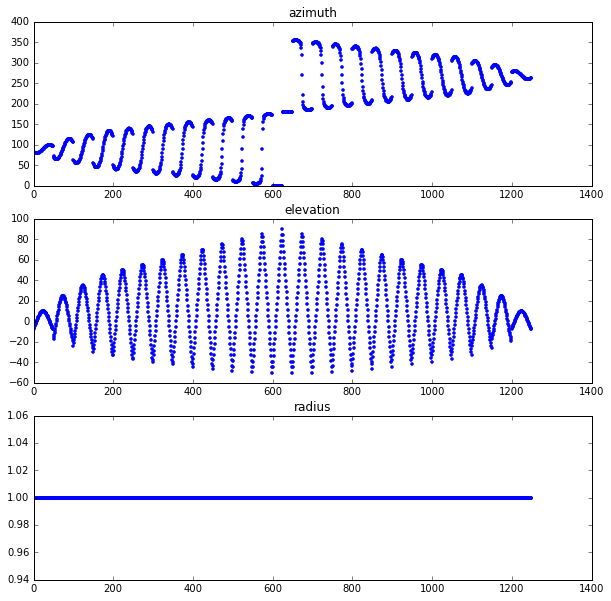

In [29]:
fig = figure(figsize=(10,10))
azimuth = subplot("311")
azimuth.set_title('azimuth')
azimuth.plot(d.variables['SourcePosition'][:][:, 0], '.')
elevation = subplot("312")
elevation.set_title("elevation")
elevation.plot(d.variables['SourcePosition'][:][:, 1], '.')
radius = subplot("313")
radius.set_title("radius")
radius.plot(d.variables['SourcePosition'][:][:, 2], '.')
# azi = d.variables['SourcePosition'][:][:, 0]
# azi

In [30]:
# fig = figure(figsize=(20,7.5))
# leftIRs = d.variables['Data.IR'][:][:, 0]
# left = subplot("211")
# left.set_title("left IRs")
# l = left.plot(leftIRs, '.')
# rightIRs = d.variables['Data.IR'][:][:, 1]
# right = subplot("212")
# right.set_title("right IRs")
# r = right.plot(rightIRs, '.')

In [31]:
scaled1 = [float(x)/pow(2,15) for x in audio1]
scaled2 = [float(x)/pow(2,15) for x in audio2]
scaled3 = [float(x)/pow(2,15) for x in audio3]
scaled4 = [float(x)/pow(2,15) for x in audio4]
scaled5 = [float(x)/pow(2,15) for x in audio5]
scaled6 = [float(x)/pow(2,15) for x in audio6]

audio = vstack((scaled1, scaled2, scaled3, scaled4, scaled5, scaled6))

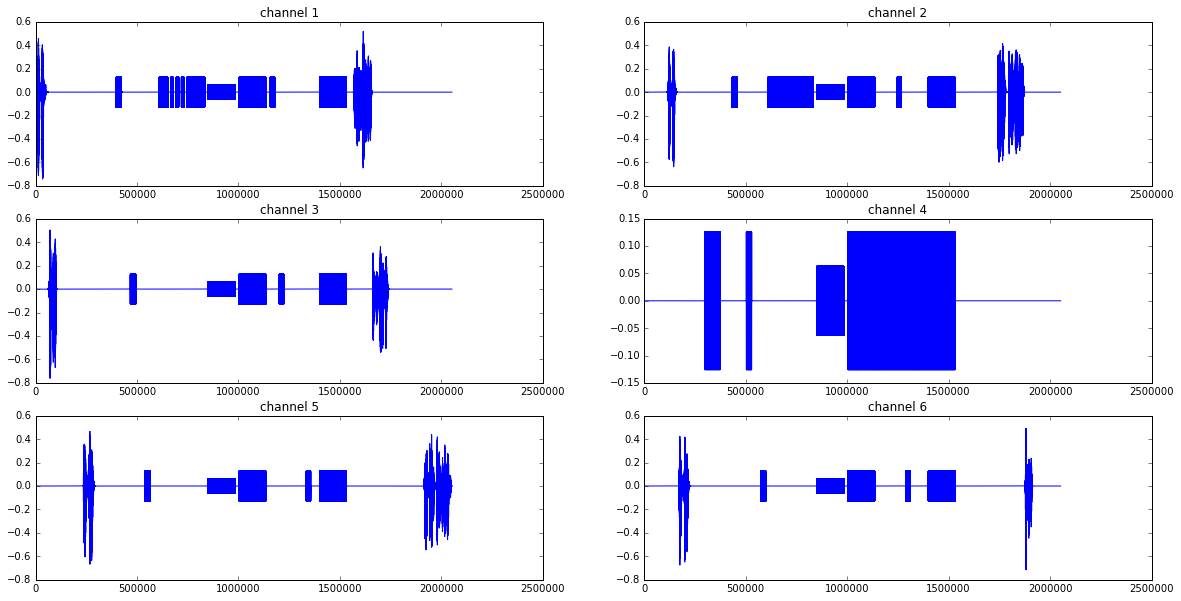

In [32]:
fig = figure(figsize=(20,10))

ch1 = subplot("321")
ch1.set_title('channel 1')
ch1.plot(audio[0])
ch2 = subplot("322")
ch2.set_title('channel 2')
ch2.plot(audio[1])
ch3 = subplot("323")
ch3.set_title('channel 3')
ch3.plot(audio[2])
ch4 = subplot("324")
ch4.set_title('channel 4')
ch4.plot(audio[3])
ch5 = subplot("325")
ch5.set_title('channel 5')
ch5.plot(audio[4])
ch6 = subplot("326")
ch6.set_title('channel 6')
ch6.plot(audio[5])

In [33]:
azimuth = d.variables['SourcePosition'][:][:, 0]
elevation = d.variables['SourcePosition'][:][:, 1]

az1 = where(azimuth == speakerAngles[0])
el1 = where(abs(elevation) < 0.001)
az2 = where(azimuth == speakerAngles[1])
el2 = where(abs(elevation) < 0.001)
az3 = where(azimuth == speakerAngles[2])
el3 = where(abs(elevation) < 0.001)
az4 = where(azimuth == speakerAngles[3])
el4 = where(abs(elevation) < 0.001)
az5 = where(azimuth == speakerAngles[4])
el5 = where(abs(elevation) < 0.001)
az6 = where(azimuth == speakerAngles[5])
el6 = where(abs(elevation) < 0.001)

In [34]:
index1 = set(az1[0]) & set(el1[0])
index2 = set(az2[0]) & set(el2[0])
index3 = set(az3[0]) & set(el3[0])
index4 = set(az4[0]) & set(el4[0])
index5 = set(az5[0]) & set(el5[0])
index6 = set(az6[0]) & set(el6[0])

In [35]:
i1 = index1.pop()
i2 = index2.pop()
i3 = index3.pop()
i4 = index4.pop()
i5 = index5.pop()
i6 = index6.pop()

In [36]:
L1 = d.variables['Data.IR'][:][i1, 0]
R1 = d.variables['Data.IR'][:][i1, 1]
L2 = d.variables['Data.IR'][:][i2, 0]
R2 = d.variables['Data.IR'][:][i2, 1]
L3 = d.variables['Data.IR'][:][i3, 0]
R3 = d.variables['Data.IR'][:][i3, 1]
L4 = d.variables['Data.IR'][:][i4, 0]
R4 = d.variables['Data.IR'][:][i4, 1]
L5 = d.variables['Data.IR'][:][i5, 0]
R5 = d.variables['Data.IR'][:][i5, 1]
L6 = d.variables['Data.IR'][:][i6, 0]
R6 = d.variables['Data.IR'][:][i6, 1]

In [37]:
c_L1 = convolve(L1, audio[0])
c_R1 = convolve(R1, audio[0])
c_L2 = convolve(L2, audio[1])
c_R2 = convolve(R2, audio[1])
c_L3 = convolve(L3, audio[2])
c_R3 = convolve(R3, audio[2])
c_L4 = convolve(L4, audio[3] * (sqrt(2)/2.0) )
c_R4 = convolve(R4, audio[3] * (sqrt(2)/2.0) )
c_L5 = convolve(L5, audio[4])
c_R5 = convolve(R5, audio[4])
c_L6 = convolve(L6, audio[5])
c_R6 = convolve(R6, audio[5])

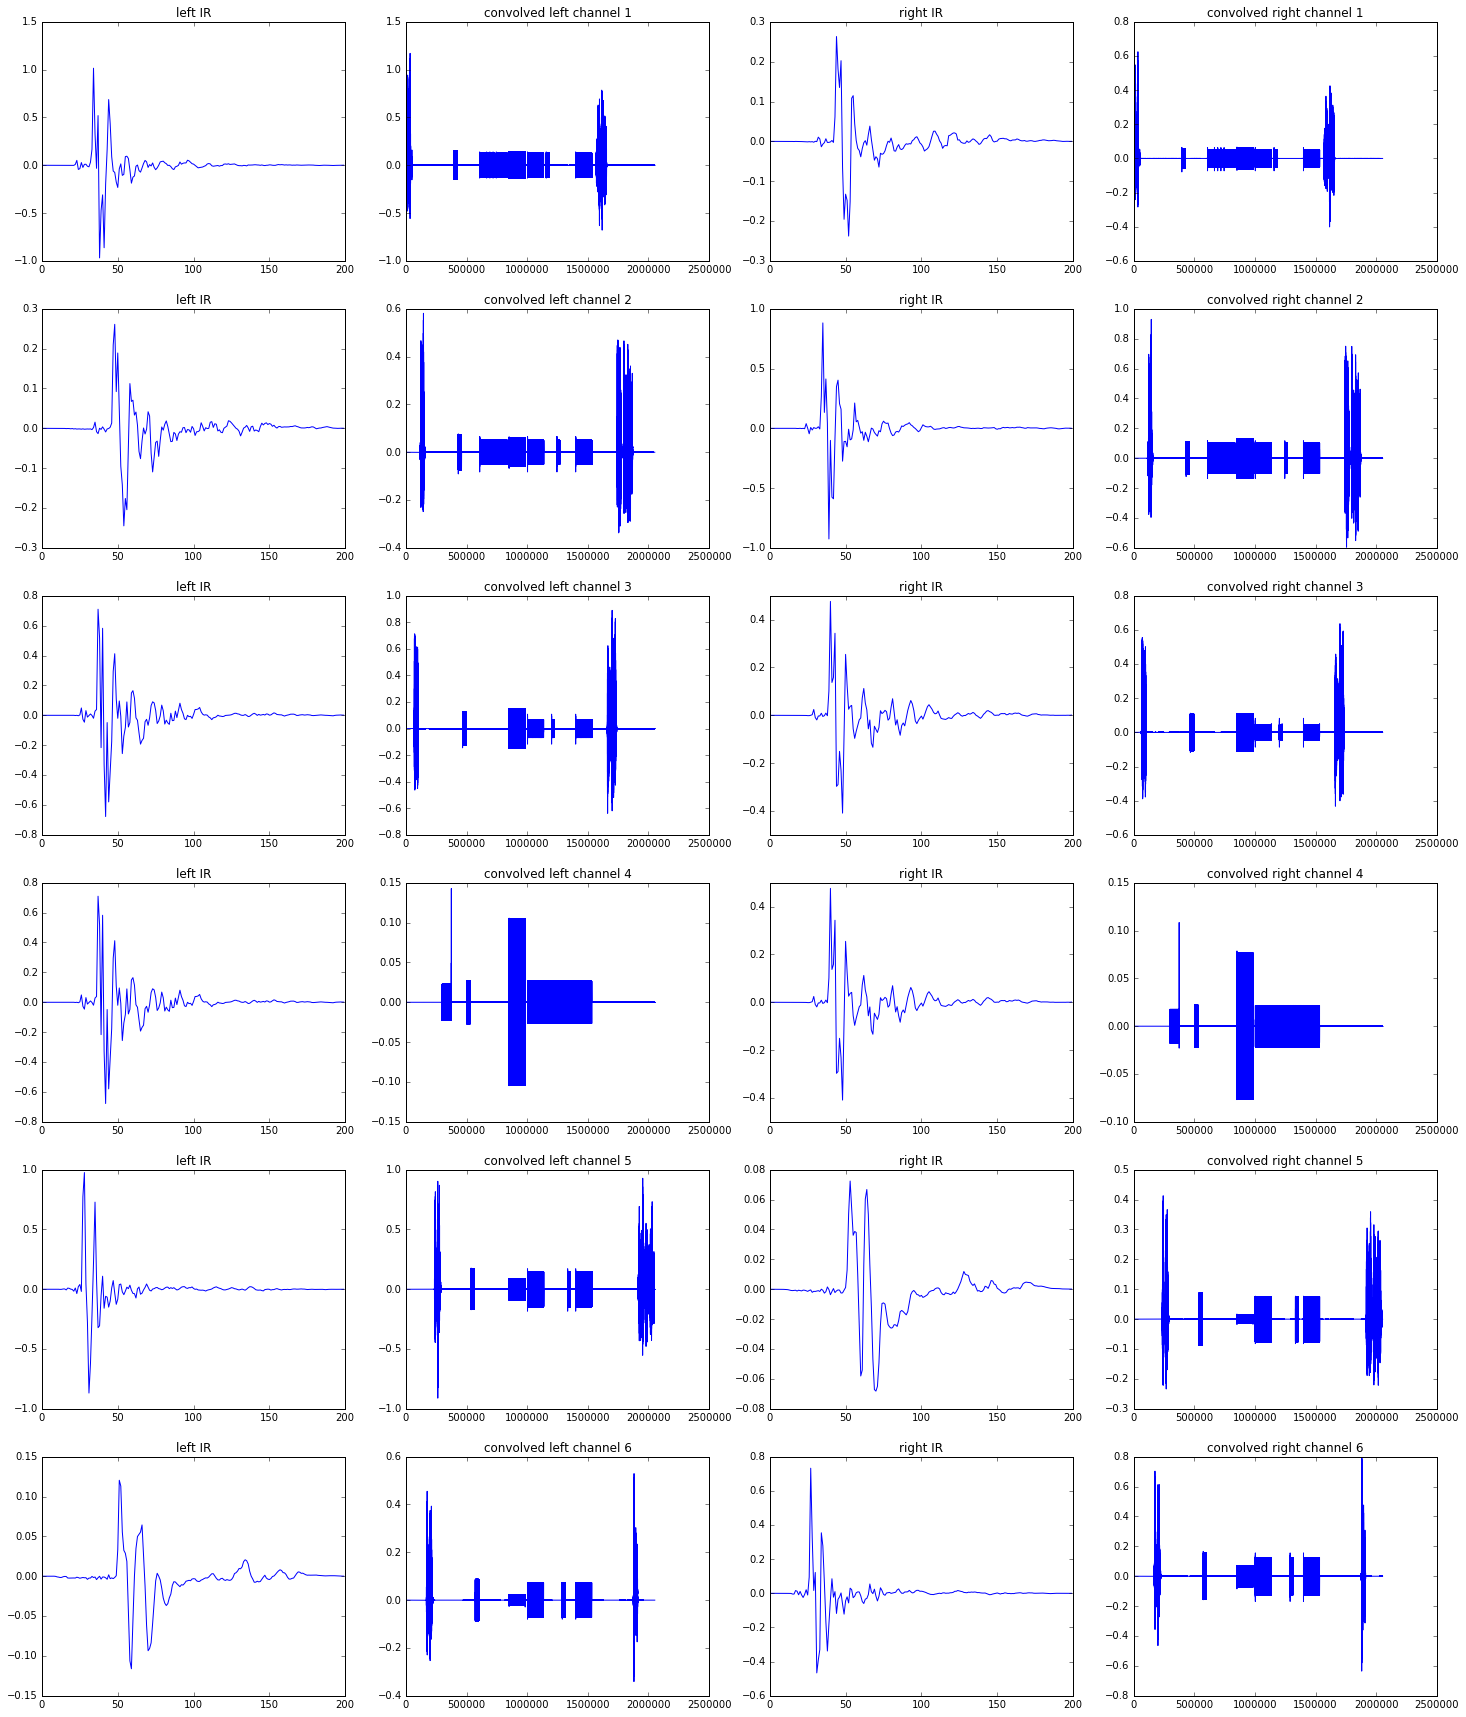

In [38]:
fig = figure(figsize=(25,30))

irL1 = subplot("641")
irL1.set_title("left IR")
irL1.plot(L1)
cL1 = subplot("642")
cL1.set_title("convolved left channel 1")
cL1.plot(c_L1)
irR1 = subplot("643")
irR1.set_title("right IR")
irR1.plot(R1)
cR1 = subplot("644")
cR1.set_title("convolved right channel 1")
cR1.plot(c_R1)

irL2 = subplot("645")
irL2.set_title("left IR")
irL2.plot(L2)
cL2 = subplot("646")
cL2.set_title("convolved left channel 2")
cL2.plot(c_L2)
irR2 = subplot("647")
irR2.set_title("right IR")
irR2.plot(R2)
cR2 = subplot("648")
cR2.set_title("convolved right channel 2")
cR2.plot(c_R2)

irL3 = subplot("649")
irL3.set_title("left IR")
irL3.plot(L3)
cL3 = subplot(6,4,10)
cL3.set_title("convolved left channel 3")
cL3.plot(c_L3)
irR3 = subplot(6,4,11)
irR3.set_title("right IR")
irR3.plot(R3)
cR3 = subplot(6,4,12)
cR3.set_title("convolved right channel 3")
cR3.plot(c_R3)

irL4 = subplot(6,4,13)
irL4.set_title("left IR")
irL4.plot(L4)
cL4 = subplot(6,4,14)
cL4.set_title("convolved left channel 4")
cL4.plot(c_L4)
irR4 = subplot(6,4,15)
irR4.set_title("right IR")
irR4.plot(R4)
cR4 = subplot(6,4,16)
cR4.set_title("convolved right channel 4")
cR4.plot(c_R4)

irL5 = subplot(6,4,17)
irL5.set_title("left IR")
irL5.plot(L5)
cL5 = subplot(6,4,18)
cL5.set_title("convolved left channel 5")
cL5.plot(c_L5)
irR5 = subplot(6,4,19)
irR5.set_title("right IR")
irR5.plot(R5)
cR5 = subplot(6,4,20)
cR5.set_title("convolved right channel 5")
cR5.plot(c_R5)

irL6 = subplot(6,4,21)
irL6.set_title("left IR")
irL6.plot(L6)
cL6 = subplot(6,4,22)
cL6.set_title("convolved left channel 6")
cL6.plot(c_L6)
irR6 = subplot(6,4,23)
irR6.set_title("right IR")
irR6.plot(R6)
cR6 = subplot(6,4,24)
cR6.set_title("convolved right channel 6")
cR6.plot(c_R6)

In [39]:
left = (c_L1 + c_L2 + c_L3 + c_L4 + c_L5 + c_L6) / 6.0
right = (c_R1 + c_R2 + c_R3 + c_R4 + c_R5 + c_R6) / 6.0

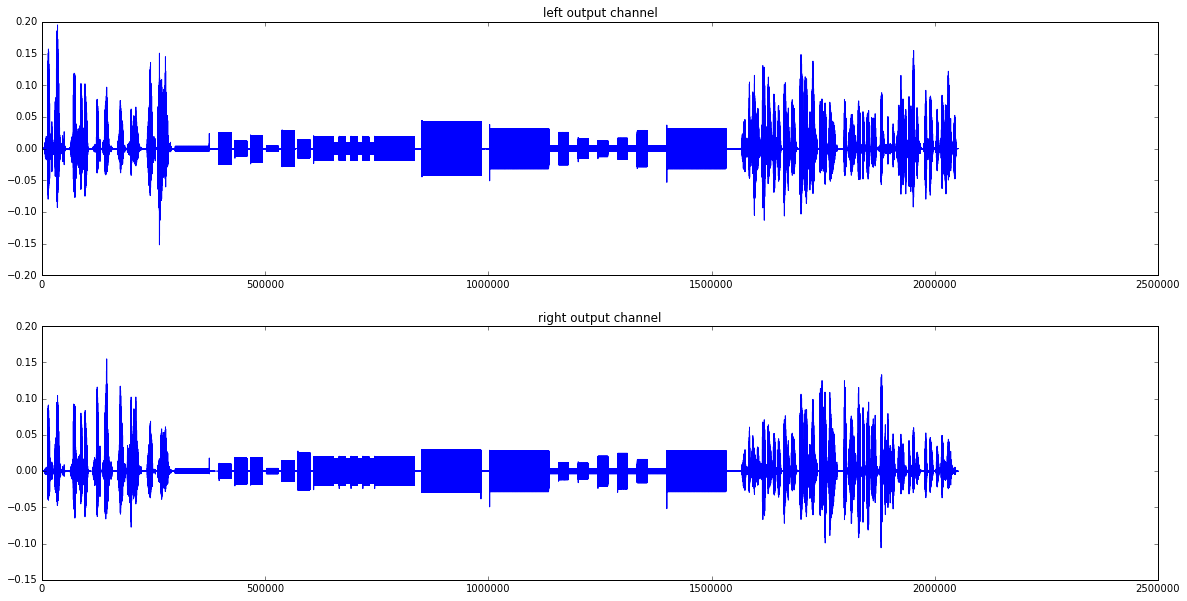

In [40]:
fig = figure(figsize(20,10))

l = subplot("211")
l.set_title("left output channel")
l.plot(left)
r = subplot("212")
r.set_title("right output channel")
r.plot(right)